# Machine Learning with Python

[Course Link](https://www.freecodecamp.org/learn/machine-learning-with-python/)

## 1. Machine Learning Fundamentals

**Artificial Intelligence** 
<br>
- The effort to automate intellectual tasks normally performed by humans. This can be simple or complex.

**Machine Learning**
<br>
- A subset of AI, can learn from data to extract rules to generate output.

**Neural Networks**
<br>
- A form of ML that uses a layered representation of data. 
- Contains an input layer of data, some number of intermediate layers to transform the data, and an output layer.
- Neural networks are not modeled after the human brain.



**Features**
<br>
This is any input data passed to a model for interpretation/prediction etc.

**Label**
<br>
The output, what you are trying to look for or predict.

Models take in **features** and generate **labels**.

## 2. Introduction to TensorFlow

In [ ]:
# Import sys
#import sys

# Install tensorflow in current environment
#!{sys.executable} -m pip install tensorflow

In [1]:
# Import tensorflow
import tensorflow as tf
# Check version
print(tf.__version__)

2.20.0


#### **Tensors**

_A tensor is a generalisation of vectors and matrices to potentially higher dimensions. Internally, TensorFlow represents tensors as n-dimensional arrays of base datatypes._

- Vectors are 'data points', without a necessary coordinate, with any amount of dimensions in it.
- Tensors are the main objects passed and manipulated throughout the package. 
- Each tensor represents a partially defined computation that will eventually produce a value.

- TensorFlow programs work by building a graph of Tensor objects that details how tensors are related.
- Running different parts of the graph allow results to be generated.
- Each tensor has a datatype and a shape.
- Just like vectors and matrices, tensors can have operations applied to them (e.g. addition, subtraction, dot product etc.)

Below are examples of tensors defined using TensorFlow, defining the tensor and its datatype:

In [8]:
# Defining tensors
tensor_string = tf.Variable('This is a string', tf.string)
tensor_number = tf.Variable(324, tf.int16)
tensor_float = tf.Variable(3.567, tf.float64)

#### **Rank/Degree**

The rank or degree of a tensor described the number of dimensions involved. The previous examples are tensors of rank 0, also known as a **scalar** (one associated value).

Below are examples of tensors with higher degrees, a list and a matrix:

In [10]:
# High degree tensors
tensor_r1 = tf.Variable(['Rank 1 Tensor'], tf.string)
tensor_r2 = tf.Variable([['Rank 2 Tensor', 'Part 1'], ['Rank 2 Tensor', 'Part 2']], tf.string)

The rank of a tensor can be extracted like so:

In [12]:
# Get tensor rank
tf.rank(tensor_r2)

<tf.Tensor: shape=(), dtype=int32, numpy=2>

The rank of the tensor is related to the deepest level of nested lists.

#### **Shape**

The shape of a tensor is the number of elements that exist in each dimension. TensorFlow will attempt to determine the shape of a tensor but sometimes it may be unknown.

The shape of a tensor can be extracted like so:

In [14]:
tensor_r2.shape

TensorShape([2, 2])

**Reshaping**

There are often shapes that have the same number of elements, making it convenient to change the shape of a tensor. The number of elements in the reshaped tensor must match the number in the original.

Below is an example of a tensor shape change:

In [17]:
# Create tenor of ones
tensor1 = tf.ones([1,2,3])
# Reshape existing data to shape [2,3,1]
tensor2 = tf.reshape(tensor1, [2,3,1])
# Reshape using -1 calculator to [3,2], where -1 infers the remaining shape based on values given i.e. 3
tensor3 = tf.reshape(tensor2, [3, -1])

print(tensor1)
print(tensor2)
print(tensor3)

tf.Tensor(
[[[1. 1. 1.]
  [1. 1. 1.]]], shape=(1, 2, 3), dtype=float32)
tf.Tensor(
[[[1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]]], shape=(2, 3, 1), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]
 [1. 1.]], shape=(3, 2), dtype=float32)


#### **Slicing**

The slice operator can be used on tensors to select specific elements. Comma separated values are used inside square brackets. Each subsequent value refers to a different dimension of the tensor.

In [19]:
# Create a 2D matrix
matrix = [[1, 2, 3, 4, 5],
          [6, 7, 8, 9, 10],
          [11, 12, 13, 14, 15],
          [16, 17, 18, 19, 20]]

# Convert to tensor
tensor = tf.Variable(matrix, tf.int32)
# Get tensor info
print(tensor)
print(tf.rank(tensor))
print(tensor.shape)

<tf.Variable 'Variable:0' shape=(4, 5) dtype=int32, numpy=
array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20]], dtype=int32)>
tf.Tensor(2, shape=(), dtype=int32)
(4, 5)


In [20]:
# Select first column
column1 = tensor[:, 0]
# Select first row
row1 = tensor[0]
# Select 1st row, 3rd element
three = tensor[0, 2]
# Select 2nd and 4th row
rows24 = tensor[1::2]
# Select column 1, rows 2 and 3
mix = tensor[1:3, 0]

# Show slices
print(column1)
print(row1)
print(three)
print(rows24)
print(mix)

tf.Tensor([ 1  6 11 16], shape=(4,), dtype=int32)
tf.Tensor([1 2 3 4 5], shape=(5,), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(
[[ 6  7  8  9 10]
 [16 17 18 19 20]], shape=(2, 5), dtype=int32)
tf.Tensor([ 6 11], shape=(2,), dtype=int32)


**Tensor Types**

Apart from `Variable` there are multiple types of tensors. The following are the most used:

- `Variable`
- `Constant`
- `Placeholder`
- `SparseTensor`

With the exception of `Variable` all these tensors are immutable. For now, `Variable` is used as we want to potentially change tensor value.

#### **Evaluating**

Evaluating a tensor means extracting its value. Since tensors represent a partially complete computation, a `session` needs to be run to evaluate the tensor.

Below is the simplest example, which evaluaes a variable in the **default graph**. 
- This graph holds all operations not specified to any other graph.
- It is possible to create our own separate graphs, if required.

In [ ]:
# Creates a session using a default graph
with tf.Session() as session:
    # Evaluates a given tensor
    tensor_name.eval()

## 3. Core Learning Algorithms

### **Linear Regression**

#### **Introduction**

Linear regression is one of the most basic forms of machine learning.

If data points are related _linearly_, we can generate a line of best fit for these points and use it to **predict future values**.

_The line of best fit refers to a line through a scatter plot of data points that best expresses the relationship between those points_

The equation of a line in two dimensions is as follows:
$$
y = mx + b
$$

Below is an example dataset with one feature and one label. This data has linear correspondence, so when $x$ increases so does $y$. 

As the example only contains two dimensions, the line will only use one input variable.

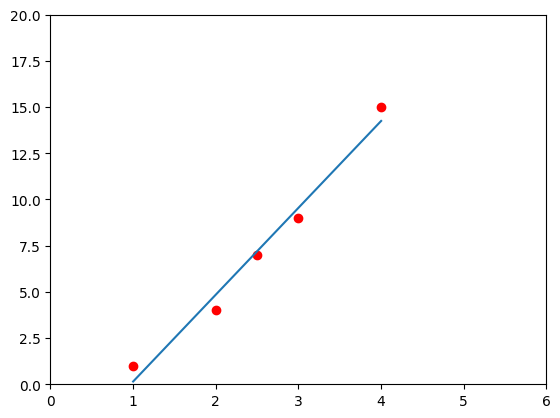

In [2]:
# Import
import matplotlib.pyplot as plt
import numpy as np

# Generate data
x = [1, 2, 2.5, 3, 4]
y = [1, 4, 7, 9, 15]
# Plot
plt.plot(x, y, 'ro')
plt.axis([0, 6, 0, 20])
# Add line of best fit
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
# Show plot
plt.show()

Once the line has been generated, the equation can be used to predict future values.

The features of the data point we'd like to predict are passed to the equation to generate relevant output.

#### **Example**

In [89]:
# # Import sys
# import sys

# # Install tensorflow-estimator in current environment
# !{sys.executable} -m pip install tensorflow-estimator


[notice] A new release of pip is available: 24.3.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# Imports
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib
import tensorflow as tf
#import tensorflow_estimator as tfe
import tensorflow.compat.v2.feature_column as fc

In [6]:
# Load data
df = pd.read_csv('titanic.csv')

# Define column list
list_cols = ['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Pclass', 'Cabin', 'Embarked']
# Extract columns
df = df[list_cols]

# Fill NaN
df.fillna({'Cabin' : 'unknown'}, inplace = True)
# Extract deck value
df.loc[df['Cabin'] != 'unknown', 'Cabin'] = df['Cabin'].str[0]

# Generate column
df['Alone'] = 'Y'
# Set column value
df.loc[df['SibSp'] > 0, 'Alone'] = 'N'

# Fill NaN
df.fillna({'Embarked' : 'unknown'}, inplace = True)
# Map values
map_embark = {
    'S' : 'Southampton',
    'C' : 'Cherbourg',
    'Q' : 'Queenstown'
}

# Replace values
df['Embarked'] = df['Embarked'].replace(map_embark)

# Format columns names
df.columns = df.columns.str.lower()
# Rename columns
df.rename(
    columns = {
        'sibsp' : 'n_siblings_spouses',
        'pclass' : 'class', 
        'cabin' : 'deck',
        'embarked' : 'embark_town'
    }, inplace = True
)

# Report
print(df.shape)
# Show data
df.head()

(891, 10)


,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,3,unknown,Southampton,N
1,1,female,38.0,1,0,71.2833,1,C,Cherbourg,N
2,1,female,26.0,0,0,7.9250,3,unknown,Southampton,Y
3,1,female,35.0,1,0,53.1000,1,C,Southampton,N
4,0,male,35.0,0,0,8.0500,3,unknown,Southampton,Y


##### **Split Data**

In [7]:
# Set number of training entries
n_entries = 627

# Split data
df_train = df.iloc[0:n_entries, :]
df_test = df.iloc[n_entries:, :]

# Pop training survival data
df_train_survive = df_train.pop('survived')
# Pop testing survival data
df_test_survive = df_test.pop('survived')

# Report
print('Training data:', df_train.shape)
print('Testing data:', df_test.shape)

Training data: (627, 9)
Testing data: (264, 9)


##### **Encoding**

Categorical data must be converted to numerical values (e.g. male = 1, female = 2) and can be achieved using built-in TensorFlow tools.

In [ ]:
# Define categorical columns
list_cat = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck', 'embark_town', 'alone']
# Define numerical columns
list_num = ['age', 'fare']

# Initialise features
list_feature_columns = []

# Iterate through categorical columns
for column in list_cat:
    
    # Get list of unique values from column
    vocabulary = df_train[column].unique()

    # Append categorised data
    list_feature_columns.append(
        tf.feature_column.categorical_column_with_vocabulary_list(
            key = column, 
            vocabulary_list = vocabulary
        )
    )

# Iterate through numerical columns
for column in list_num:

    # Append data as float32 values
    list_feature_columns.append(
        tf.feature_column.numeric_column(
            key = column,
            dtype = tf.float32
        )
    )

print(list_feature_columns)

##### **Training**

Model data will be streamed in batches of 32 entries.

One pass of the full dataset through the model is called an **epoch**. We use multiple epochs to allow the model better predictive power.

An **input function** is required to define how the dataset is converted into batches within each epoch.

##### **Input Function**

The TensorFlow model used requires data be passed as a `tf.data.Dataset` object. An input function must be created to convert the pandas dataframe into this object.

An definition of this kind of input function is shown below, and documentation can be found [here](https://www.tensorflow.org/tutorials/estimator/linear).

In [9]:
# Define outer function
def make_input_fn(df_data, df_labels, num_epochs = 10, shuffle = True, batch_size = 32):
    
    # Define inner function, to be returned
    def input_function():
        
        # Create tf.data.Dataset object
        ds = tf.data.Dataset.from_tensor_slice(
            (
                dict(df_data), 
                df_labels
            )
        )
        
        # Check shuffle parameter
        if shuffle:
            
            # Randomise data order
            ds = ds.shuffle(1000)
        
        # Split dataset into batches and repeat for num_epochs
        ds = ds.batch(batch_size).repeat(num_epochs)

        return ds
    
    return input_function

In [ ]:
tf.__version__()

##### **Model Creation**

Here, we use a linear estimator to utilise the linear regression algorithm:

In [ ]:
# Create linear estimator using feature columns
linear_est = tf.estimator.LinearClassifier(feature_columns = list_feature_columns)

### **Classification**

### **Clustering**

### **Hidden Markov Models**